In [455]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [456]:
df = pd.read_csv("Bank Turnover Dataset.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [457]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [458]:
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)

In [459]:
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [460]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [461]:
df.duplicated().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

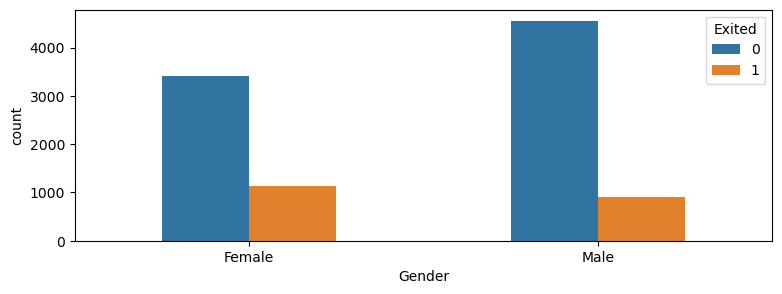

In [462]:
plt.figure(figsize=(9,3))
sns.countplot(data=df,x='Gender',hue='Exited',width=0.5)

<Axes: xlabel='Geography', ylabel='count'>

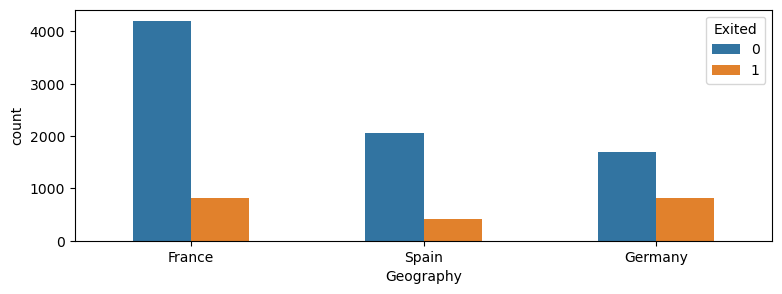

In [463]:
plt.figure(figsize=(9,3))
sns.countplot(data=df,x='Geography',hue='Exited',width=0.5)

<Axes: xlabel='Age', ylabel='Count'>

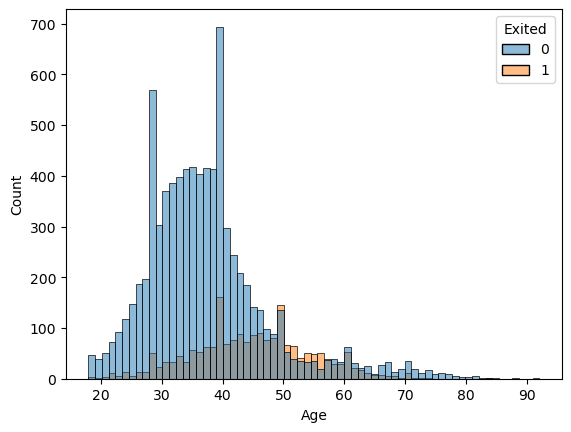

In [464]:
sns.histplot(data=df,x='Age',hue='Exited')

<Axes: xlabel='Tenure', ylabel='Count'>

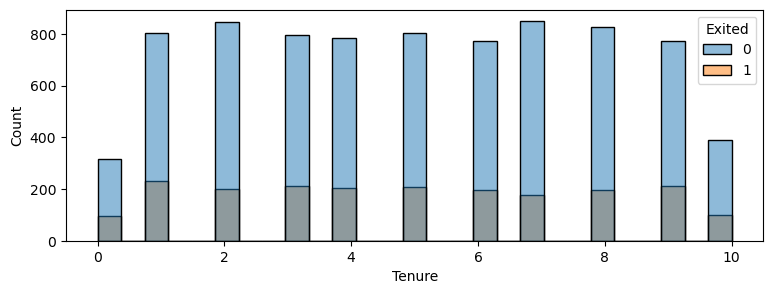

In [465]:
plt.figure(figsize=(9,3))
sns.histplot(data=df,x='Tenure',hue='Exited')

<Axes: xlabel='Balance', ylabel='Count'>

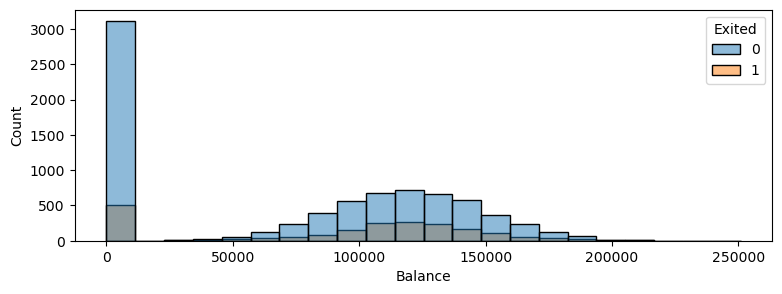

In [466]:
plt.figure(figsize=(9,3))
sns.histplot(data=df,x='Balance',hue='Exited')

<Axes: xlabel='HasCrCard', ylabel='count'>

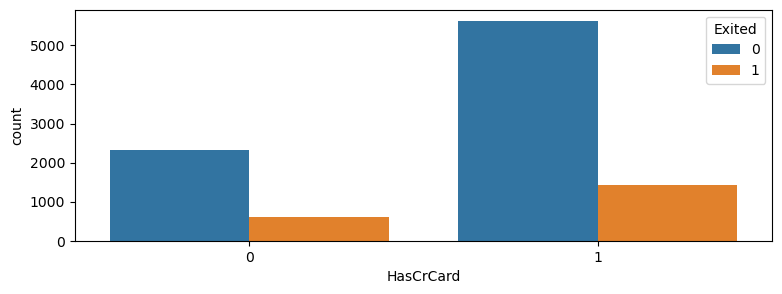

In [467]:
plt.figure(figsize=(9,3))
sns.countplot(data=df,x='HasCrCard',hue='Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

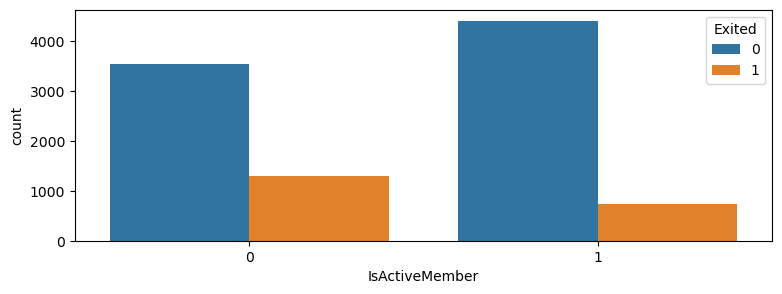

In [468]:
plt.figure(figsize=(9,3))
sns.countplot(data=df,x='IsActiveMember',hue='Exited')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

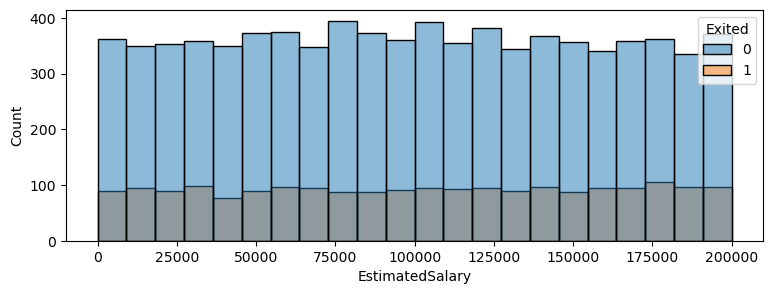

In [469]:
plt.figure(figsize=(9,3))
sns.histplot(data=df,x='EstimatedSalary',hue='Exited')

In [470]:
from pandas_profiling import ProfileReport

In [471]:
report=ProfileReport(df)

In [472]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [473]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [474]:
df['Geography']=le.fit_transform(df['Geography'])

In [475]:
df['Gender']=le.fit_transform(df['Gender'])

In [476]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [477]:
#df.drop(df[df['Balance']==0].index,inplace=True)

In [478]:
#df.drop(df[df['Tenure']==0].index,inplace=True)

In [479]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [480]:
X_train.shape


(8000, 10)

In [481]:
X_test.shape


(2000, 10)

In [482]:
len(X_train.columns)


10

In [483]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/Users/skt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/skt/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7907 - loss: 0.0000e+00
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.7880 - loss: 0.0000e+00
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.7958 - loss: 0.0000e+00
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.7983 - loss: 0.0000e+00
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.8046 - loss: 0.0000e+00
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.8009 - loss: 0.0000e+00
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.7963 - loss: 0.0000e+00
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8004 - loss: 0.0000e+00
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.7952 - loss: 0.0000e+00
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.7976 - loss: 0.0000e+00


In [484]:
model.evaluate(X_test, y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8118 - loss: 0.0000e+00


/Users/skt/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


[0.0, 0.796500027179718]

In [485]:
y_pred = model.predict(X_test)
y_pred[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [486]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(45.722222222222214, 0.5, 'Truth')

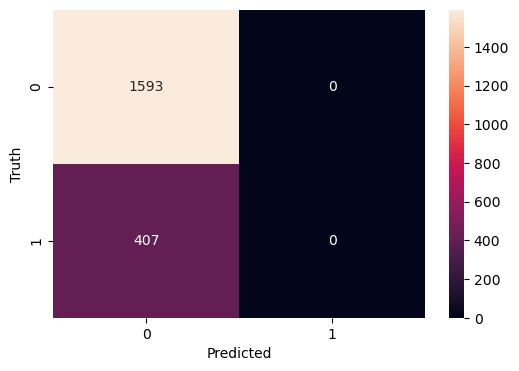

In [487]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [488]:
#pip install pycaret

In [489]:
#df.drop(df[df['Balance']==0].index,inplace=True)

In [490]:
#df.drop(df[df['Tenure']==0].index,inplace=True)

X = df.drop(['Exited'],axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [491]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [492]:
lgr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [493]:
print(classification_report(y_test,lgr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(45.722222222222214, 0.5, 'Truth')

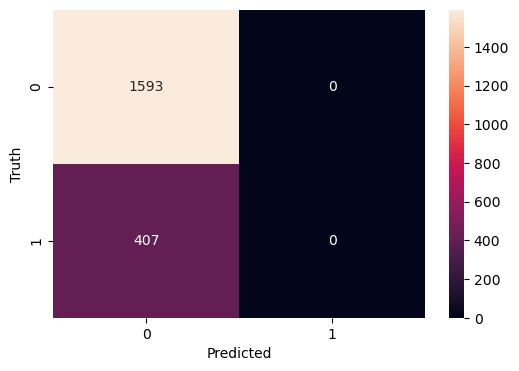

In [494]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=lgr.predict(X_test))

plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [495]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [496]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [497]:
print(classification_report(y_test,mnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.56      0.66      1593
           1       0.23      0.52      0.32       407

    accuracy                           0.55      2000
   macro avg       0.53      0.54      0.49      2000
weighted avg       0.70      0.55      0.59      2000



Text(45.722222222222214, 0.5, 'Truth')

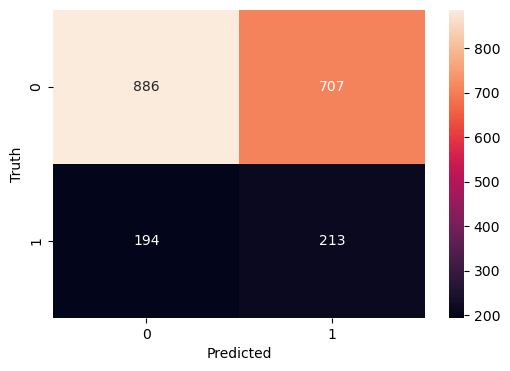

In [498]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=mnb.predict(X_test))

plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [499]:
print(classification_report(y_test,gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.35      0.06      0.11       407

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.49      2000
weighted avg       0.71      0.79      0.72      2000



In [500]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [501]:
print(classification_report(y_test,dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.46      0.48      0.47       407

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000



Text(45.722222222222214, 0.5, 'Truth')

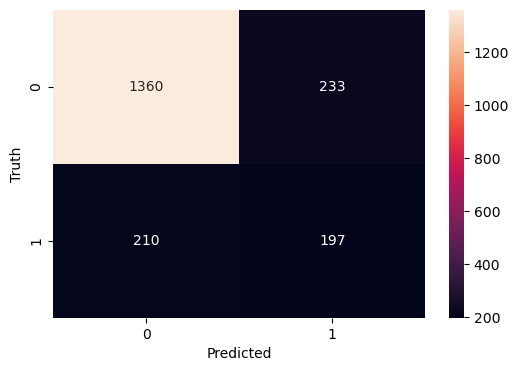

In [502]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=dtc.predict(X_test))

plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [503]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [504]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Text(45.722222222222214, 0.5, 'Truth')

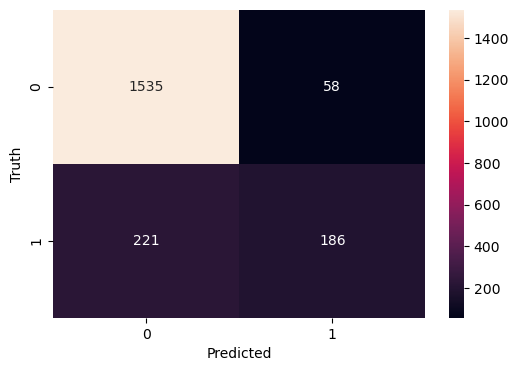

In [505]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=rfc.predict(X_test))

plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [506]:
modelclasses=[['Logistic Regression',LogisticRegression],
              ['Naive Bayes',MultinomialNB],
              ['Random Forest',RandomForestClassifier],
              ['Decision Tree', DecisionTreeClassifier]
             ]

In [507]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [508]:
results=[]

In [509]:
for modelname,Model in modelclasses:
    model=Model()
    model.fit(X_train,y_train)
    acc=accuracy_score(y_test,model.predict(X_test))
    rec=recall_score(y_test,model.predict(X_test))
    f1=f1_score(y_test,model.predict(X_test))
    results.append({"Model name":modelname,"Accuracy": round(acc,2),"Recall": round(rec,2),"F1 score":round(f1,2)})
    
results_df=pd.DataFrame(results)

In [510]:
results_df

,Model name,Accuracy,Recall,F1 score
0,Logistic Regression,0.80,0.00,0.00
1,Naive Bayes,0.55,0.52,0.32
2,Random Forest,0.86,0.45,0.56
3,Decision Tree,0.78,0.47,0.46


In [511]:
#Using Grid Search cross validation technique we will find the best value of hyper parameters - 
#Here we are finding the best kernel
from sklearn.model_selection import GridSearchCV
parameters = [ {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split':[10,20,30,40,50,60]}]
grid_search = GridSearchCV(estimator = dtc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [512]:
best_parameters

{'max_depth': 7, 'min_samples_split': 40}

In [513]:
dtc_tuned=DecisionTreeClassifier(max_depth=7,min_samples_split=40)
dtc_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=40)

In [514]:
print(classification_report(y_test,dtc_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [515]:
print(classification_report(y_test,dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.46      0.48      0.47       407

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000



In [ ]:
results2=[]

In [ ]:
def display_scorecard():
    results2=[]
    def update_scorecard(model,y_test,y_pred):
        results2.append({"Model":model,
                           "Accuracy Score":accuracy_score(y_test,y_pred),
                          "Precision Score": precision_score(y_test,y_pred),
                            "Recall Score": recall_score(y_test,y_pred),
                            "f1 score": f1_score(y_test,y_pred)})
        results2_df=pd.DataFrame(dtc_results)
        return results2_df
    update_scorecard("Initial Decision Tree Model",y_test,dtc.predict(X_test))
    update_scorecard("Tuned Decision Tree Model",y_test,dtc_tuned.predict(X_test))
    update_scorecard("Initial Random Forest Model",y_test,rfc.predict(X_test))
    update_scorecard("Tuned Random Forest Model",y_test,rfc_tuned.predict(X_test))



   

In [ ]:
update_scorecard("Initial Decision Tree Model",y_test,dtc.predict(X_test))

In [ ]:
update_scorecard("Tuned Decision Tree Model",y_test,dtc_tuned.predict(X_test))

In [516]:
#define a classfier with no set hyperparameter, as we will be finding the best fit using grid search

clf=RandomForestClassifier(random_state=42)

In [517]:
# This is how grid is defined, we create a dictionary of hyperparameters we want to check and pass a list

param_grid = { 'n_estimators': [100, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini', 'entropy']}

In [518]:
# Then you finally run the grid search
gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)

In [519]:
gridSearch.fit(X_train, y_train)

/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/skt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/skt/anac

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [520]:
gridSearch.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500}

In [521]:
rfc_tuned=RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators= 500)

In [522]:
rfc_tuned.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [523]:
update_scorecard("Initial Random Forest Model",y_test,rfc.predict(X_test))

,Model,Accuracy Score,Precision Score,Recall Score,f1 score
0,Initial Model,0.7815,0.464953,0.488943,0.476647
1,Tuned Model,0.8570,0.746939,0.449631,0.561350
2,Initial RFC Model,0.8585,0.760504,0.444717,0.561240
3,Tuned RFC Model,0.8605,0.764463,0.454545,0.570108


In [524]:
update_scorecard("Tuned Random Forest Model",y_test,rfc_tuned.predict(X_test))

,Model,Accuracy Score,Precision Score,Recall Score,f1 score
0,Initial Model,0.7815,0.464953,0.488943,0.476647
1,Tuned Model,0.8570,0.746939,0.449631,0.561350
2,Initial RFC Model,0.8585,0.760504,0.444717,0.561240
3,Tuned RFC Model,0.8605,0.764463,0.454545,0.570108
